<a href="https://colab.research.google.com/github/Delila7/Intro-to-Python-Cognitive-Class/blob/main/Introduction_to_NLU_from_Johnsnowlabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLU: State of the Art Text Mining in Python
The Simplicity of Python, the Power of Spark NLP

* **Powerful One-Liners**: Over a thousand NLP models in hundreds of languages are at your fingertips with just one line of code
*   **Elegant Python**: Directly read and write pandas dataframes for frictionless integration with other libraries and existing ML pipelines







# 1. **Install NLU**
**Super Quickstart on Google Colab or Kaggle:**

If you work on a fresh Notebook on Kaggle or Google colab, you can just copy paste the following commands into your first cell which will automatically setup Java, nlu and import nlu, so you are good to go right away!


In [ ]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu pyspark==2.4.7
import nlu



^C


In [ ]:
import nlu

You can test it out right away with :

In [ ]:
nlu.load('emotion').predict('wow that was easy')

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:37053)
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/py4j/java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: ignored

# **2. NLU Concepts**
The NLU library provides 2 simple methods with which most NLU tasks can be solved while achieving state of the art results.
### **The load and predict method.**

When building a NLU programm you will usually go through the following steps :

1.   Pick a model/pipeline/component you want to create from the NLU namespace
2.   Call the nlu.load(component) method which returns a NLU model pipeline object
1.   Call model.predict() on some String input

These 3 steps have been boiled down to just 1 line

# 3. NLU components
NLU defines a universe of NLU components which can be viewed as **stackable** and interchangeable parts, inspired by methodology of category theory.

Inside of this NLU universe, arbitrary machine learning pipelines can be constructed from its elements.

### NLU currently defines 18 components types in its universe.
Each component type embelishes one of many component kinds.

Each component kind embelished one of many NLU algorithms.

NLU algorithms are represented by pretrained models or pipelines.

A **pretrained** model could be a Deep Neural Network or a simple word matcher.

A **pipeline** consists of a stack of pretrained models.

## NLU component types
Any of the actions for the component types can be passed as a string to nlu.load() and will return you the default model for that component type for the English language. You can further specify your model selection by placing a ‘.’ behind your component selection.

After the ‘.’ you can specify the model you want via specifying a dataset or model version.

See the NLU components namespace and The load function

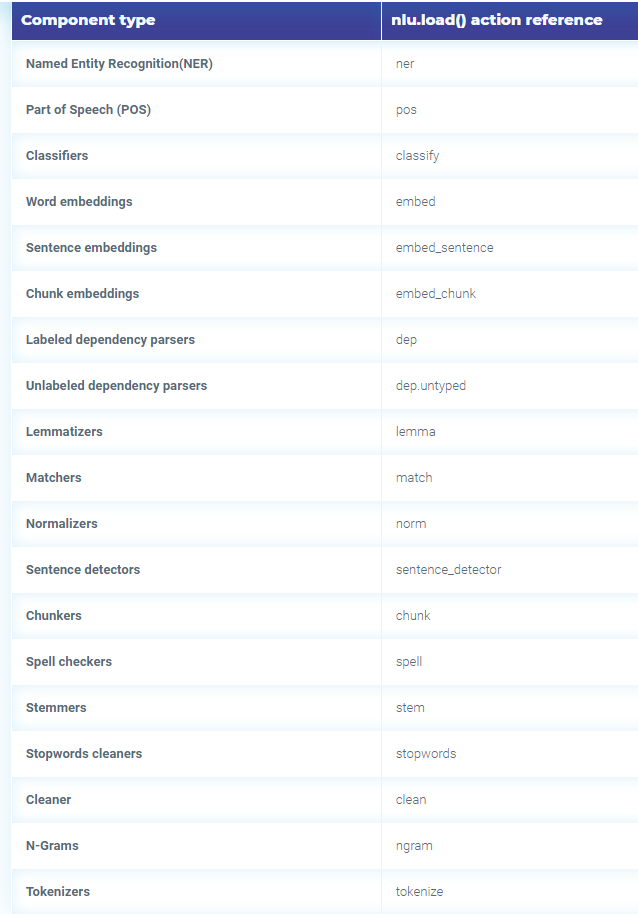

# 4. **NLU Simple Preprocessing Examples**
## 4.1 Tokenizers

In [ ]:
tokens  = nlu.load('en.tokenize').predict('Each word and symbol in a sentence will generate token.')

In [ ]:
tokens

,document
origin_index,
0,Each word and symbol in a sentence will genera...


In [ ]:
nlu.load('tokenize').predict('Our first example is to tokenize words and tokens',output_level='token')

,token
origin_index,
0,Our
0,first
0,example
0,is
0,to
0,tokenize
0,words
0,and
0,tokens


## 4.2 Stemming

In [ ]:
nlu.load('stemm').predict('Our first example is to tokenize words and tokens')

,stem,token
origin_index,,
0,our,Our
0,first,first
0,exampl,example
0,i,is
0,to,to
0,token,tokenize
0,word,words
0,and,and
0,token,tokens


In [ ]:
nlu.load('stemm').predict('Our first example is to tokenize words and tokens',output_level='document')

,stem,document
origin_index,,
0,"[our, first, exampl, i, to, token, word, and, ...",Our first example is to tokenize words and tokens


## 4.3 Lemmatize

In [ ]:
nlu.load('lemma').predict('Our first example is to tokenize words and tokens')

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]


,lemma,document
origin_index,,
0,"[Our, first, example, be, to, tokenize, word, ...",Our first example is to tokenize words and tokens


## 4.4 Part of speech tagging
The result is automatically saved as a pandas dataframe.

In [ ]:
pos_example = nlu.load('pos').predict('Part of speech assigns each token in a sentence a grammatical label')

pos_anc download started this may take some time.
Approximate size to download 4.3 MB
[OK!]


In [ ]:
type(pos_example)

pandas.core.frame.DataFrame

In [ ]:
pos_example

,pos,token
origin_index,,
0,NN,Part
0,IN,of
0,NN,speech
0,NNS,assigns
0,DT,each
0,NN,token
0,IN,in
0,DT,a
0,NN,sentence


## 4.5 Stop words removal

In [ ]:
pipe = nlu.load('stopwords')
result = pipe.predict('''The Baltimore plant that recently had to scrap up to 15 million ruined doses
 had flouted rules and downplayed errors, according to internal audits, ex-employees and clients. 
 Other doses had to be scrapped last year.''',output_level='document')

stopwords_en download started this may take some time.
Approximate size to download 2.9 KB
[OK!]


In [ ]:
result

,cleanTokens,document
origin_index,,
0,"[Baltimore, plant, recently, scrap, 15, millio...",The Baltimore plant that recently had to scrap...


In [ ]:
result.columns

Index(['cleanTokens', 'document'], dtype='object')

In [ ]:
result.cleanTokens[0]

['Baltimore',
 'plant',
 'recently',
 'scrap',
 '15',
 'million',
 'ruined',
 'doses',
 'flouted',
 'rules',
 'downplayed',
 'errors',
 ',',
 'internal',
 'audits',
 ',',
 'ex-employees',
 'clients',
 '.',
 'doses',
 'scrapped',
 'year',
 '.']

In [ ]:
result.document[0]

'The Baltimore plant that recently had to scrap up to 15 million ruined doses had flouted rules and downplayed errors, according to internal audits, ex-employees and clients. Other doses had to be scrapped last year.'

## 4.6 Spelling check

In [ ]:
spelling_pipe = nlu.load('spell')


spellcheck_dl download started this may take some time.
Approximate size to download 112.2 MB
[OK!]


In [ ]:
check = spelling_pipe.predict('i liek to misspell many worfs, whta is wrog?')

In [ ]:
check

,token,spell
origin_index,,
0,i,i
0,liek,like
0,to,to
0,misspell,Cassell
0,many,many
0,worfs,words
0,",",","
0,whta,what
0,is,is


## 4.7 N-grams

In [ ]:
example_text =  ["A person like Jim or Joe", 
 "An organisation like Microsoft or PETA",
 "A location like Germany",
 "Anything else like Playstation", 
 "Person consisting of multiple tokens like Angela Merkel or Donald Trump",
 "Organisations consisting of multiple tokens like JP Morgan",
 "Locations consiting of multiple tokens like Los Angeles", 
 "Anything else made up of multiple tokens like Super Nintendo",]


In [ ]:
ngram_pipe = nlu.load('ngram')

pos_anc download started this may take some time.
Approximate size to download 4.3 MB
[OK!]


In [ ]:
ngram_pipe.predict(example_text)

,pos,ngrams
origin_index,,
0,"[DT, NN, IN, NNP, CC, NNP]",A person
0,"[DT, NN, IN, NNP, CC, NNP]",person like
0,"[DT, NN, IN, NNP, CC, NNP]",like Jim
0,"[DT, NN, IN, NNP, CC, NNP]",Jim or
0,"[DT, NN, IN, NNP, CC, NNP]",or Joe
1,"[DT, NN, IN, NNP, CC, NNP]",An organisation
1,"[DT, NN, IN, NNP, CC, NNP]",organisation like
1,"[DT, NN, IN, NNP, CC, NNP]",like Microsoft
1,"[DT, NN, IN, NNP, CC, NNP]",Microsoft or


In [ ]:
ngram_pipe['ngram'].setN(3)

NGramGenerator_5baec0b04613

In [ ]:
ngram_pipe.predict(example_text)

,pos,ngrams
origin_index,,
0,"[DT, NN, IN, NNP, CC, NNP]",A person like
0,"[DT, NN, IN, NNP, CC, NNP]",person like Jim
0,"[DT, NN, IN, NNP, CC, NNP]",like Jim or
0,"[DT, NN, IN, NNP, CC, NNP]",Jim or Joe
1,"[DT, NN, IN, NNP, CC, NNP]",An organisation like
1,"[DT, NN, IN, NNP, CC, NNP]",organisation like Microsoft
1,"[DT, NN, IN, NNP, CC, NNP]",like Microsoft or
1,"[DT, NN, IN, NNP, CC, NNP]",Microsoft or PETA
2,"[DT, NN, IN, NNP]",A location like


In [ ]:
ngram_pipe.predict(example_text,output_level='document')

,pos,ngrams,document
origin_index,,,
0,"[DT, NN, IN, NNP, CC, NNP]","[A person like, person like Jim, like Jim or, ...",A person like Jim or Joe
1,"[DT, NN, IN, NNP, CC, NNP]","[An organisation like, organisation like Micro...",An organisation like Microsoft or PETA
2,"[DT, NN, IN, NNP]","[A location like, location like Germany]",A location like Germany
3,"[NN, RB, IN, NNP]","[Anything else like, else like Playstation]",Anything else like Playstation
4,"[NN, VBG, IN, JJ, NNS, IN, NNP, NNP, CC, NNP, ...","[Person consisting of, consisting of multiple,...",Person consisting of multiple tokens like Ange...
5,"[NNP, VBG, IN, JJ, NNS, IN, NNP, NNP]","[Organisations consisting of, consisting of mu...",Organisations consisting of multiple tokens li...
6,"[NNP, VBG, IN, JJ, NNS, IN, NNP, NNP]","[Locations consiting of, consiting of multiple...",Locations consiting of multiple tokens like Lo...
7,"[NN, RB, VBN, RP, IN, JJ, NNS, IN, NNP, NNP]","[Anything else made, else made up, made up of,...",Anything else made up of multiple tokens like ...


## 4.8 Sentence detector / sentence segmentation

In [ ]:
sentence_pipe = nlu.load('sentence_detector')

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


In [ ]:
text_data = '''
Denial is the most predictable of all human responses. But, rest assured, this will be the sixth time we have destroyed it, and we have become exceedingly efficient at it.
I am the Architect. I created the Matrix. I've been waiting for you. You have many questions, and although the process has altered your consciousness, you remain irrevocably human. Ergo, some of my answers you will understand, and some of them you will not. Concordantly, while your first question may be the most pertinent, you may or may not realize it is also the most irrelevant.
Your life is the sum of a remainder of an unbalanced equation inherent to the programming of the matrix. You are the eventuality of an anomaly, which despite my sincerest efforts I have been unable to eliminate from what is otherwise a harmony of mathematical precision. While it remains a burden assiduously avoided, it is not unexpected, and thus not beyond a measure of control. Which has led you, inexorably, here.
'''

In [ ]:
sentence_pipe.predict(text_data,output_level='sentence')

,sentence
origin_index,
0,Denial is the most predictable of all human re...
0,"But, rest assured, this will be the sixth time..."
0,I am the Architect.
0,I created the Matrix.
0,I've been waiting for you.
0,"You have many questions, and although the proc..."
0,"Ergo, some of my answers you will understand, ..."
0,"Concordantly, while your first question may be..."
0,Your life is the sum of a remainder of an unba...
